
=== DRONE ROUTES (Tabu Search) ===
Cluster 0, Drone 1, Route: [0, 3, 4, 2, 25, 24, 26, 27, 28, 29, 30, 0]
Cluster 0, Drone 2, Route: [0, 1, 0]
Cluster 1, Drone 1, Route: [1, 15, 12, 59, 18, 20, 19, 60, 47, 62, 63, 61, 23, 22, 21, 53, 52, 48, 51, 50, 71, 72, 1]
Cluster 1, Drone 2, Route: [1, 49, 10, 9, 7, 55, 54, 6, 8, 56, 5, 11, 13, 14, 16, 17, 57, 58, 1]
Cluster 2, Drone 1, Route: [2, 31, 0, 36, 37, 38, 2]
Cluster 2, Drone 2, Route: [2, 66, 64, 65, 46, 67, 33, 34, 32, 42, 43, 41, 44, 39, 40, 35, 45, 68, 69, 70, 2]

Cluster 0 (Drones: 2)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H25 -> H24 -> H26 -> H27 -> H28 -> H29 -> H30 -> R0
    Total distance: 141.25 km | Est. time: 78.47 min
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km | Est. time: 60.66 min

Cluster 1 (Drones: 2)
  Drone 1 Route: R1 -> H15 -> H12 -> H59 -> H18 -> H20 -> H19 -> H60 -> H47 -> H62 -> H63 -> H61 -> H23 -> H22 -> H21 -> H53 -> H52 -> H48 -> H51 -> H50 -> H71 -> H72 -> R1
    Total distance: 301.29 k

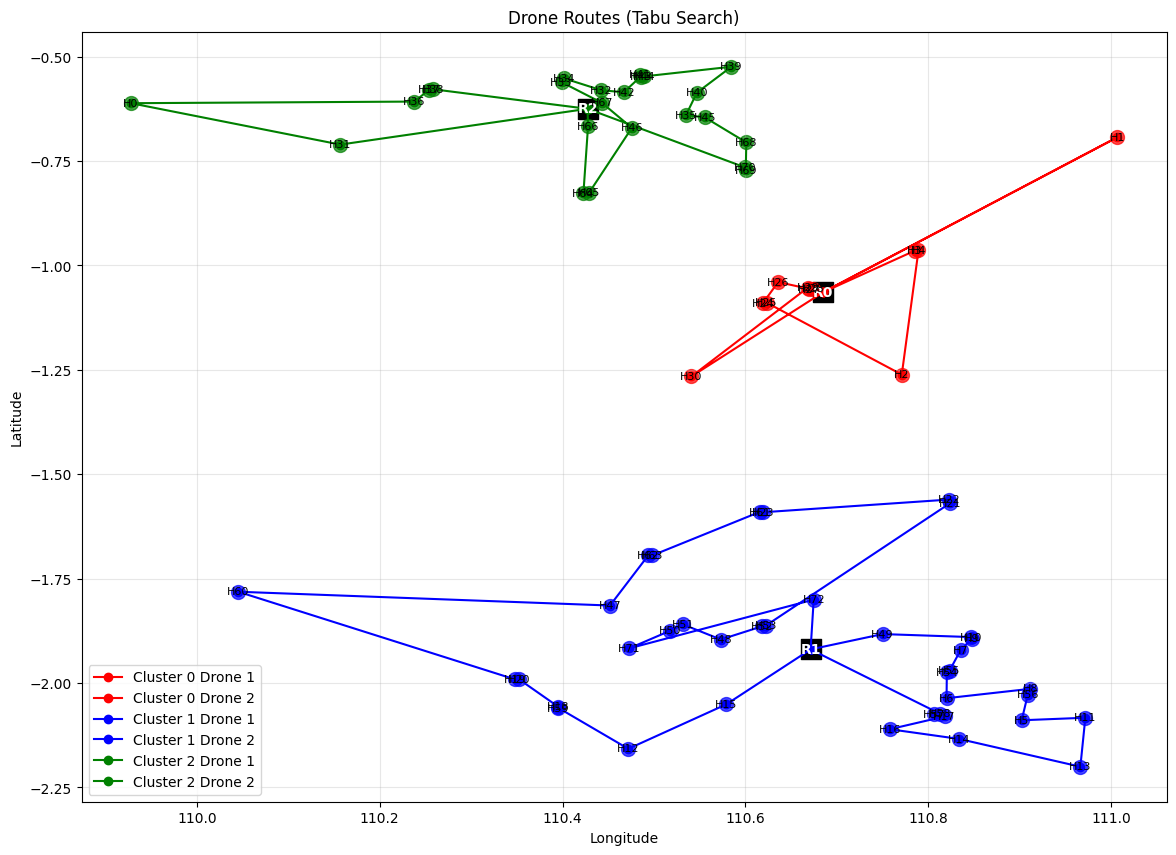

In [1]:
from ts import ClusterBasedDroneRoutingTS

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}

routing_ts = ClusterBasedDroneRoutingTS(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes = routing_ts.optimize_all_clusters()

routing_ts.print_cluster_routes(routes)
routing_ts.visualize_cluster_routes(routes)


Tabu Search Bayesian Optimization

In [2]:
def objective(trial):
    tabu_tenure = trial.suggest_int("tabu_tenure", 5, 30)
    max_iter = trial.suggest_int("max_iter", 100, 500)
    neighborhood_size = trial.suggest_int("neighborhood_size", 1, 200)

    routing_ts = ClusterBasedDroneRoutingTS(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2}
    )

    routes = routing_ts.optimize_all_clusters(
        tabu_tenure=tabu_tenure,
        max_iter=max_iter,
        neighborhood_size=neighborhood_size
    )

    # Hitung total distance dari semua cluster (km)
    total_distance = 0
    for cid, cluster_routes in routes.items():
        for route, hotspot_indices in cluster_routes:
            locs = [routing_ts.road_points[cid]] + [routing_ts.coordinates[i] for i in hotspot_indices]
            dist_matrix = routing_ts.build_dist_matrix(locs)
            for i in range(len(route)-1):
                total_distance += dist_matrix[route[i]][route[i+1]]

    return total_distance


In [9]:
import optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best params:", study.best_params)
print("Best total distance:", study.best_value)

[I 2025-10-02 17:06:16,242] A new study created in memory with name: no-name-36a86fc5-bb54-407c-b97c-d7230f60bfae
[I 2025-10-02 17:06:17,684] Trial 0 finished with value: 944.1857200154361 and parameters: {'tabu_tenure': 30, 'max_iter': 209, 'neighborhood_size': 94}. Best is trial 0 with value: 944.1857200154361.
[I 2025-10-02 17:06:19,614] Trial 1 finished with value: 950.2596698785287 and parameters: {'tabu_tenure': 18, 'max_iter': 251, 'neighborhood_size': 116}. Best is trial 0 with value: 944.1857200154361.
[I 2025-10-02 17:06:20,729] Trial 2 finished with value: 944.1857200154361 and parameters: {'tabu_tenure': 30, 'max_iter': 413, 'neighborhood_size': 32}. Best is trial 0 with value: 944.1857200154361.
[I 2025-10-02 17:06:21,966] Trial 3 finished with value: 944.1857200154361 and parameters: {'tabu_tenure': 17, 'max_iter': 124, 'neighborhood_size': 174}. Best is trial 0 with value: 944.1857200154361.
[I 2025-10-02 17:06:24,845] Trial 4 finished with value: 944.1857200154361 and p

Best params: {'tabu_tenure': 30, 'max_iter': 209, 'neighborhood_size': 94}
Best total distance: 944.1857200154361


Running TS with params: {'tabu_tenure': 30, 'max_iter': 209, 'neighborhood_size': 94}

=== DRONE ROUTES (Tabu Search) ===
Cluster 0, Drone 1, Route: [0, 3, 4, 2, 25, 24, 26, 27, 28, 29, 30, 0]
Cluster 0, Drone 2, Route: [0, 1, 0]
Cluster 1, Drone 1, Route: [1, 15, 12, 59, 18, 20, 19, 60, 47, 62, 63, 61, 23, 22, 21, 53, 52, 48, 51, 50, 71, 72, 1]
Cluster 1, Drone 2, Route: [1, 49, 10, 9, 7, 55, 54, 6, 8, 56, 5, 11, 13, 14, 16, 17, 57, 58, 1]
Cluster 2, Drone 1, Route: [2, 31, 0, 36, 37, 38, 2]
Cluster 2, Drone 2, Route: [2, 66, 64, 65, 46, 67, 33, 34, 32, 42, 43, 41, 44, 39, 40, 35, 45, 68, 69, 70, 2]

Cluster 0 (Drones: 2)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H25 -> H24 -> H26 -> H27 -> H28 -> H29 -> H30 -> R0
    Total distance: 141.25 km | Est. time: 78.47 min
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km | Est. time: 60.66 min

Cluster 1 (Drones: 2)
  Drone 1 Route: R1 -> H15 -> H12 -> H59 -> H18 -> H20 -> H19 -> H60 -> H47 -> H62 -> H63 -> H61 -> H23 -> H22 -> H

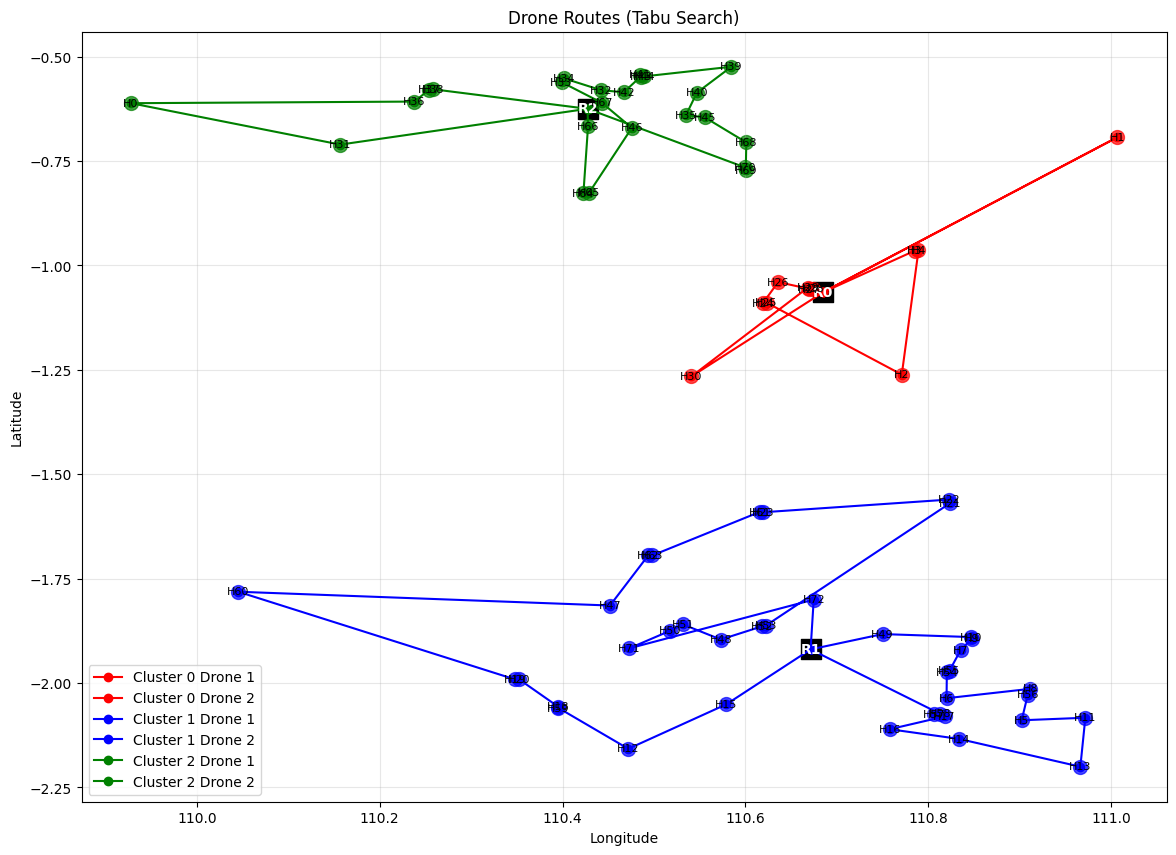

In [10]:
# best_params = {'tabu_tenure': 16, 'max_iter': 131, 'neighborhood_size': 70}
from ts import ClusterBasedDroneRoutingTS

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}

# buat routing problem
routing_ts_opt = ClusterBasedDroneRoutingTS(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

print("Running TS with params:", study.best_params)

routes_opt = routing_ts_opt.optimize_all_clusters(
    tabu_tenure=study.best_params["tabu_tenure"],
    max_iter=study.best_params["max_iter"],
    neighborhood_size=study.best_params["neighborhood_size"]
)

# tampilkan hasil
routing_ts.print_cluster_routes(routes_opt)
routing_ts.visualize_cluster_routes(routes_opt)


In [11]:
tabu_tenure=study.best_params["tabu_tenure"],
max_iter=study.best_params["max_iter"],
neighborhood_size=study.best_params["neighborhood_size"]

print(tabu_tenure)
print(max_iter)
print(neighborhood_size)

(30,)
(209,)
94
